In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [2]:
import keras_tuner as kt
from keras_tuner import RandomSearch

In [ ]:
from collections import Counter

In [3]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [4]:
from matplotlib.ticker import MaxNLocator

In [5]:
import relative_accuracy as ra
import MVA as ga
import geh as ga1
from statistics import mean, stdev

In [6]:
# Load all Inputs and Output Data

# 5 mins (1 step ahead)
Deep_train_5   = np.load("Deep_train_5.npz")['x'] 
Output_train_5 = np.load("Deep_train_5.npz")['y']

Deep_test_5   = np.load("Deep_test_5.npz")['x'] 
Output_test_5 = np.load("Deep_test_5.npz")['y'] 

# 15 mins (3 steps ahead)
Deep_train_15   = np.load("Deep_train_15.npz")['x'] 
Output_train_15 = np.load("Deep_train_15.npz")['y']

Deep_test_15   = np.load("Deep_test_15.npz")['x'] 
Output_test_15 = np.load("Deep_test_15.npz")['y']

# 30 mins (6 steps ahead)
Deep_train_30   = np.load("Deep_train_30.npz")['x'] 
Output_train_30 = np.load("Deep_train_30.npz")['y']

Deep_test_30   = np.load("Deep_test_30.npz")['x'] 
Output_test_30 = np.load("Deep_test_30.npz")['y']

# 60 mins (12 steps ahead)
Deep_train_60   = np.load("Deep_train_60.npz")['x'] 
Output_train_60 = np.load("Deep_train_60.npz")['y']

Deep_test_60   = np.load("Deep_test_60.npz")['x'] 
Output_test_60 = np.load("Deep_test_60.npz")['y']

In [7]:
# Wide Data
Xtrain = joblib.load("002weeks_train.save") 
Xtest = joblib.load("002weeks_test.save") 

In [8]:
# 5 mins
# Delete first 15 samples
Wide_train_5 = np.delete(Xtrain, np.s_[0:15], 0)
Wide_test_5 = np.delete(Xtest, np.s_[0:15], 0)

In [9]:
# 15 mins
# Delete first 17 samples
Wide_train_15 = np.delete(Xtrain, np.s_[0:17], 0)
Wide_test_15 = np.delete(Xtest, np.s_[0:17], 0)

In [10]:
# 30 mins
# Delete first 20 samples
Wide_train_30 = np.delete(Xtrain, np.s_[0:20], 0)
Wide_test_30 = np.delete(Xtest, np.s_[0:20], 0)

In [11]:
# 60 mins
# Delete first 27 samples
Wide_train_60 = np.delete(Xtrain, np.s_[0:26], 0)
Wide_test_60 = np.delete(Xtest, np.s_[0:26], 0)

In [12]:
scaler_filename = "scaler.save"
scaler = joblib.load(scaler_filename) 

In [13]:
Test      = pd.read_csv('01test_scaled.csv', index_col=0, parse_dates=[8])

# Reshape Samples

The first step is to split the input sequences into subsequences that can be processed by the CNN model. Here, each spatio-temporal sample can be split into three sub-samples, each with five time steps. The CNN can interpret each subsequence of five time steps and provide a time series of interpretations of the subsequences to the LSTM model to process as input.

In [14]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 7              # No of loop detectors
n_seq = 3                    # Subsequences
n_steps = 5                  # time-step per subsequence
val_percent = 0.12962        # 2 weeks
batch_size = 32

#### 5 mins

In [15]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt5 = Deep_train_5.reshape((Deep_train_5.shape[0], n_seq, n_steps, n_features))
yt5 = Output_train_5

In [16]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv5 = Deep_test_5.reshape((Deep_test_5.shape[0], n_seq, n_steps, n_features))
yv5 = Output_test_5

#### 15 mins

In [17]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt15 = Deep_train_15.reshape((Deep_train_15.shape[0], n_seq, n_steps, n_features))
yt15 = Output_train_15

In [18]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv15 = Deep_test_15.reshape((Deep_test_15.shape[0], n_seq, n_steps, n_features))
yv15 = Output_test_15

#### 30 mins

In [19]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt30 = Deep_train_30.reshape((Deep_train_30.shape[0], n_seq, n_steps, n_features))
yt30 = Output_train_30

In [20]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv30 = Deep_test_30.reshape((Deep_test_30.shape[0], n_seq, n_steps, n_features))
yv30 = Output_test_30

#### 60 mins

In [21]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt60 = Deep_train_60.reshape((Deep_train_60.shape[0], n_seq, n_steps, n_features))
yt60 = Output_train_60

In [22]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv60 = Deep_test_60.reshape((Deep_test_60.shape[0], n_seq, n_steps, n_features))
yv60 = Output_test_60

### Reshaping the Data for Conv2D layer

For Conv2D, there is a need to add one more dimension to show we're dealing with 1 channel (since technically the images are in black and white, only showing values from 0-max flow on a single channel).

Conv1D - strides in 1 dimension
Conv2D - strides in 2 dimensions

In [23]:
# define no_of_channels
n_channels = 1

In [24]:
# Train data
Xt5  =  Xt5.reshape(Xt5.shape[0], n_seq, n_steps, n_features, n_channels)
Xt15 =  Xt15.reshape(Xt15.shape[0], n_seq, n_steps, n_features, n_channels)
Xt30 =  Xt30.reshape(Xt30.shape[0], n_seq, n_steps, n_features, n_channels)
Xt60 =  Xt60.reshape(Xt60.shape[0], n_seq, n_steps, n_features, n_channels)

# Validation data
Xv5  =  Xv5.reshape(Xv5.shape[0], n_seq, n_steps, n_features, n_channels)
Xv15 =  Xv15.reshape(Xv15.shape[0], n_seq, n_steps, n_features, n_channels)
Xv30 =  Xv30.reshape(Xv30.shape[0], n_seq, n_steps, n_features, n_channels)
Xv60 =  Xv60.reshape(Xv60.shape[0], n_seq, n_steps, n_features, n_channels)

In [25]:
Wt5  = Wide_train_5
Wt15 = Wide_train_15
Wt30 = Wide_train_30
Wt60 = Wide_train_60

Wv5  = Wide_test_5
Wv15 = Wide_test_15
Wv30 = Wide_test_30
Wv60 = Wide_test_60

# CNN-LSTM model

In [26]:
from tensorflow import keras

# Early Stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [27]:
stop = keras.callbacks.EarlyStopping(
    monitor = 'val_loss', 
    patience = 5,
    restore_best_weights = True)

In [28]:
Wide_train_5.shape

(31089, 14)

# 5 mins ahead

In [29]:
model5 = keras.models.load_model("my_dir/7d-CNN-LSTM-5") 

### Evaluation on inverse_transform

In [30]:
test_predictions5 = model5.predict((Wv5,Xv5))

yv5 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
yv5 = yv5[15:,4]

df = Test.drop(Test.head(15).index)
df.reset_index(inplace = True)
df = df.drop(columns=['index','Timestamp'])
df['f5'] = pd.Series(test_predictions5.flatten())

test_predictions5 = scaler.inverse_transform(df)

test_predictions5 = test_predictions5[:,4]

#MSE5 = mean_squared_error(yv5,test_predictions5)

#MAE5 = mean_absolute_error(yv5,test_predictions5)

#RMSE5 = np.sqrt(MSE5)

#MAPE5 = mean_absolute_percentage_error(yv5,test_predictions5)*100

#eval5 = [MSE5, MAE5, RMSE5, MAPE5]
#print(eval5)

In [31]:
RA10 = ra.RA_10(np.asarray(yv5), np.asarray(test_predictions5))
RA15 = ra.RA_15(np.asarray(yv5), np.asarray(test_predictions5))
RA20 = ra.RA_20(np.asarray(yv5), np.asarray(test_predictions5))

res5 = [RA10, RA15, RA20]
print(res5)

[72.19317898929549, 87.17948717948718, 94.22454568085637]


In [32]:
GEH, num, actual, predicted = ga.GEH(np.asarray(yv5), np.asarray(test_predictions5))
GEH1, _ = ga1.GEH(np.asarray(yv5), np.asarray(test_predictions5))

In [33]:
GEH = np.pad(GEH[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))
GEH1 = np.pad(GEH1[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))

In [34]:
actual = np.pad(actual, (1, 1), 'edge')
predicted = np.pad(predicted, (1, 1), 'edge')

In [35]:
x = np.arange(1,len(GEH)+1)
x1 = np.arange(1,len(GEH1)+1)

In [36]:
yv5 = np.pad(yv5[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))
test_predictions5 = np.pad(test_predictions5[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))
actual = np.pad(actual[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))
predicted = np.pad(predicted[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))

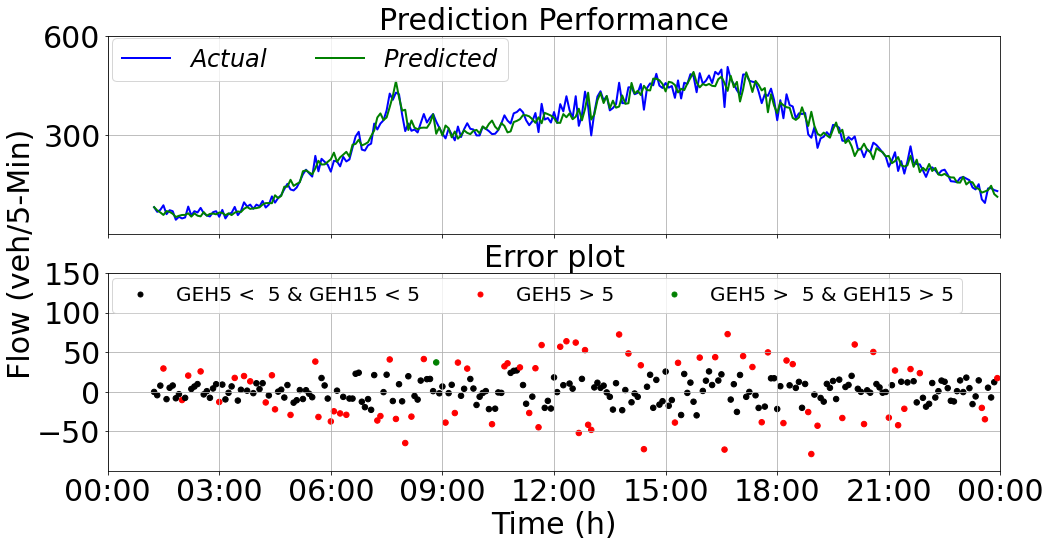

In [50]:
x= np.arange(0,288)
col = np.where(GEH>5, 'g', np.where(GEH1>5, 'r','k'))

fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(16,8))

#set tick labels font size for y-axis only
# axes.tick_params(axis='y', which='both', labelsize=20)

# 1 Prediction plot
axes[0].plot(yv5, lw=2, label=r'$Actual$', color='blue')
axes[0].plot(test_predictions5, lw=2, label=r'$Predicted$', color='green')
axes[0].legend(bbox_to_anchor=(0.005,0.77,0.4,0.1), loc="lower left", mode=None, 
               borderaxespad=0, ncol=4, prop={'size': 24})
axes[0].set_title('Prediction Performance', fontsize=30)
axes[0].grid()
# x
axes[0].set_xlim(0,288)
axes[0].set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes[0].set_xticklabels([])
# y
axes[0].set_ylim(0,600)
axes[0].set_ylabel('Flow (veh/5-Min)', fontsize=30)
axes[0].yaxis.set_major_locator(MaxNLocator(nbins=2, prune='lower'))
axes[0].yaxis.set_label_coords(-0.08,-0.1)
axes[0].tick_params(axis='y', labelsize= 30)



# 2 Error plot
axes[1].scatter(x, (yv5-test_predictions5), s=30, c=col)
line1, = axes[1].plot(0, 0, marker="o", markersize=0.01, markeredgecolor="black", 
                      markerfacecolor="black", label='GEH5 <  5 & GEH15 < 5', ls="None")
line2, = axes[1].plot(0, 0, marker="o", markersize=0.01, markeredgecolor="red", 
                      markerfacecolor="red", label='GEH5 > 5', ls="None")
line3, = axes[1].plot(0, 0, marker="o", markersize=0.01, markeredgecolor="green", 
                      markerfacecolor="green", label='GEH5 >  5 & GEH15 > 5', ls="None")
axes[1].legend(handles=[line1, line2, line3], markerscale=500, bbox_to_anchor=(0.005,0.8,1,0.1), 
               loc="lower left", mode=None, borderaxespad=0, ncol=3, prop={'size': 20})
axes[1].set_title('Error plot', fontsize=30)
axes[1].grid()

# x
axes[1].set_xlim(0,288)
axes[1].set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes[1].set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'], fontsize=30)
axes[1].set_xlabel('Time (h)', fontsize=30)
#y
axes[1].set_ylim(-100, 150)
axes[1].yaxis.set_major_locator(MaxNLocator(nbins=6, prune='lower'))
axes[1].tick_params(axis='y', labelsize= 30)


plt.show()

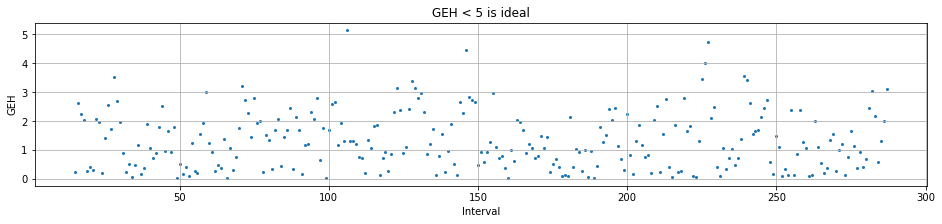

In [51]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(figsize=(16,3))

# Now use the axes object to add stuff to plot
axes.scatter(x, GEH, 4)
axes.set_xlabel('Interval')
axes.set_ylabel('GEH')
axes.set_title('GEH < 5 is ideal')
axes.grid()

In [52]:
GEH5 = num/len(GEH)

# 15 mins ahead

In [53]:
model15 = keras.models.load_model("my_dir/7d-CNN-LSTM-15")

### Evaluation on inverse_transform

In [106]:
test_predictions15 = model15.predict((Wv15,Xv15))

yv15 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
yv15 = yv15[17:,4]

df = Test.drop(Test.head(17).index)
df.reset_index(inplace = True)
df = df.drop(columns=['index','Timestamp'])
df['f5'] = pd.Series(test_predictions15.flatten())

test_predictions15 = scaler.inverse_transform(df)

test_predictions15 = test_predictions15[:,4]

#MSE15 = mean_squared_error(yv15,test_predictions15)

#MAE15 = mean_absolute_error(yv15,test_predictions15)

#RMSE15 = np.sqrt(MSE15)

#MAPE15 = mean_absolute_percentage_error(yv15,test_predictions15)*100

#eval15 = [MSE15, MAE15, RMSE15, MAPE15]
#print(eval15)

In [107]:
RA10 = ra.RA_10(np.asarray(yv15), np.asarray(test_predictions15))
RA15 = ra.RA_15(np.asarray(yv15), np.asarray(test_predictions15))
RA20 = ra.RA_20(np.asarray(yv15), np.asarray(test_predictions15))

res15 = [RA10, RA15, RA20]
print(res15)

[65.97758405977584, 82.61519302615193, 91.73100871731009]


In [108]:
GEH, num, actual, predicted = ga.GEH(np.asarray(yv15), np.asarray(test_predictions15))
GEH1, _ = ga1.GEH(np.asarray(yv15), np.asarray(test_predictions15))

In [109]:
GEH = np.pad(GEH[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))
GEH1 = np.pad(GEH1[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))

In [110]:
actual = np.pad(actual, (1, 1), 'edge')
predicted = np.pad(predicted, (1, 1), 'edge')

In [111]:
x = np.arange(1,len(GEH)+1)
x1 = np.arange(1,len(GEH1)+1)

In [112]:
yv15 = np.pad(yv15[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))
test_predictions15 = np.pad(test_predictions15[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))
actual = np.pad(actual[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))
predicted = np.pad(predicted[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))

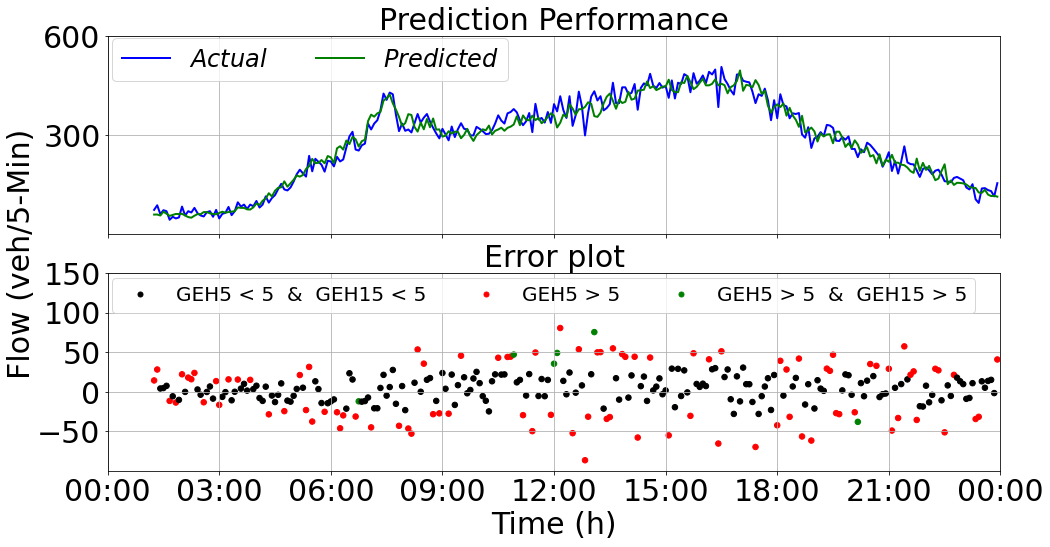

In [115]:
x= np.arange(0,288)
col = np.where(GEH>5, 'g', np.where(GEH1>5, 'r','k'))

fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(16,8))

#set tick labels font size for y-axis only
# axes.tick_params(axis='y', which='both', labelsize=20)

# 1 Prediction plot
axes[0].plot(yv15, lw=2, label=r'$Actual$', color='blue')
axes[0].plot(test_predictions15, lw=2, label=r'$Predicted$', color='green')
axes[0].legend(bbox_to_anchor=(0.005,0.77,0.4,0.1), loc="lower left", mode=None, 
               borderaxespad=0, ncol=4, prop={'size': 24})
axes[0].set_title('Prediction Performance', fontsize=30)
axes[0].grid()
# x
axes[0].set_xlim(0,288)
axes[0].set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes[0].set_xticklabels([])
# y
axes[0].set_ylim(0,600)
axes[0].set_ylabel('Flow (veh/5-Min)', fontsize=30)
axes[0].yaxis.set_major_locator(MaxNLocator(nbins=2, prune='lower'))
axes[0].yaxis.set_label_coords(-0.08,-0.1)
axes[0].tick_params(axis='y', labelsize= 30)



# 2 Error plot
axes[1].scatter(x, (yv15-test_predictions15), s=30, c=col)
line1, = axes[1].plot(0, 0, marker="o", markersize=0.01, markeredgecolor="black", 
                      markerfacecolor="black", label='GEH5 < 5  &  GEH15 < 5', ls="None")
line2, = axes[1].plot(0, 0, marker="o", markersize=0.01, markeredgecolor="red", 
                      markerfacecolor="red", label='GEH5 > 5', ls="None")
line3, = axes[1].plot(0, 0, marker="o", markersize=0.01, markeredgecolor="green", 
                      markerfacecolor="green", label='GEH5 > 5  &  GEH15 > 5', ls="None")
axes[1].legend(handles=[line1, line2, line3], markerscale=500, bbox_to_anchor=(0.005,0.8,1,0.1), 
               loc="lower left", mode=None, borderaxespad=0, ncol=3, prop={'size': 20})
axes[1].set_title('Error plot', fontsize=30)
axes[1].grid()

# x
axes[1].set_xlim(0,288)
axes[1].set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes[1].set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'], fontsize=30)
axes[1].set_xlabel('Time (h)', fontsize=30)
#y
axes[1].set_ylim(-100, 150)
axes[1].yaxis.set_major_locator(MaxNLocator(nbins=6, prune='lower'))
axes[1].tick_params(axis='y', labelsize= 30)


plt.show()

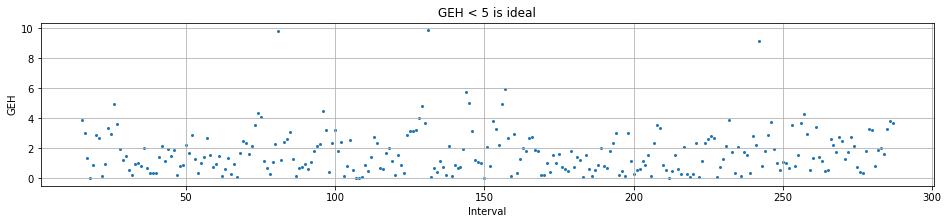

In [116]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(figsize=(16,3))

# Now use the axes object to add stuff to plot
axes.scatter(x, GEH, 4)
axes.set_xlabel('Interval')
axes.set_ylabel('GEH')
axes.set_title('GEH < 5 is ideal')
axes.grid()

In [117]:
GEH15 = num/len(GEH)

# 30 mins ahead

In [85]:
model30 = keras.models.load_model("my_dir/7d-CNN-LSTM-30")

### Evaluation on inverse_transform

In [117]:
test_predictions30 = model30.predict((Wv30,Xv30))

yv30 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
yv30 = yv30[20:,4]

df = Test.drop(Test.head(20).index)
df.reset_index(inplace = True)
df = df.drop(columns=['index','Timestamp'])
df['f5'] = pd.Series(test_predictions30.flatten())

test_predictions30 = scaler.inverse_transform(df)

test_predictions30 = test_predictions30[:,4]

#MSE30 = mean_squared_error(yv30,test_predictions30)

#MAE30 = mean_absolute_error(yv30,test_predictions30)

#RMSE30 = np.sqrt(MSE30)

#MAPE30 = mean_absolute_percentage_error(yv30,test_predictions30)*100

#eval30 = [MSE30, MAE30, RMSE30, MAPE30]
#print(eval30)

In [118]:
RA10 = ra.RA_10(np.asarray(yv30), np.asarray(test_predictions30))
RA15 = ra.RA_15(np.asarray(yv30), np.asarray(test_predictions30))
RA20 = ra.RA_20(np.asarray(yv30), np.asarray(test_predictions30))

res30 = [RA10, RA15, RA20]
print(res30)

[65.02991026919243, 82.55234297108674, 91.50049850448654]


In [119]:
GEH, num, actual, predicted = ga.GEH(np.asarray(yv30), np.asarray(test_predictions30))
GEH1, _ = ga1.GEH(np.asarray(yv30), np.asarray(test_predictions30))

In [120]:
GEH = np.pad(GEH[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))
GEH1 = np.pad(GEH1[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))

In [121]:
actual = np.pad(actual, (1, 1), 'edge')
predicted = np.pad(predicted, (1, 1), 'edge')

In [122]:
x = np.arange(1,len(GEH)+1)
x1 = np.arange(1,len(GEH1)+1)

In [123]:
yv30 = np.pad(yv30[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))
test_predictions30 = np.pad(test_predictions30[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))
actual = np.pad(actual[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))
predicted = np.pad(predicted[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))

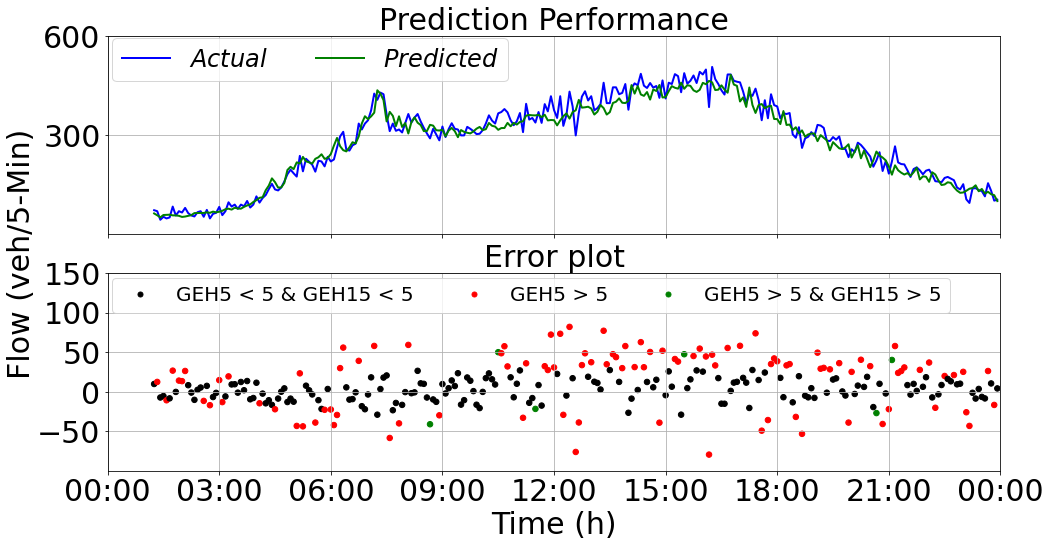

In [126]:
x= np.arange(0,288)
col = np.where(GEH>5, 'g', np.where(GEH1>5, 'r','k'))

fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(16,8))

#set tick labels font size for y-axis only
# axes.tick_params(axis='y', which='both', labelsize=20)

# 1 Prediction plot
axes[0].plot(yv30, lw=2, label=r'$Actual$', color='blue')
axes[0].plot(test_predictions30, lw=2, label=r'$Predicted$', color='green')
axes[0].legend(bbox_to_anchor=(0.005,0.77,0.4,0.1), loc="lower left", mode=None, 
               borderaxespad=0, ncol=4, prop={'size': 24})
axes[0].set_title('Prediction Performance', fontsize=30)
axes[0].grid()
# x
axes[0].set_xlim(0,288)
axes[0].set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes[0].set_xticklabels([])
# y
axes[0].set_ylim(0,600)
axes[0].set_ylabel('Flow (veh/5-Min)', fontsize=30)
axes[0].yaxis.set_major_locator(MaxNLocator(nbins=2, prune='lower'))
axes[0].yaxis.set_label_coords(-0.08,-0.1)
axes[0].tick_params(axis='y', labelsize= 30)



# 2 Error plot
axes[1].scatter(x, (yv30-test_predictions30), s=30, c=col)
line1, = axes[1].plot(0, 0, marker="o", markersize=0.01, markeredgecolor="black", 
                      markerfacecolor="black", label='GEH5 < 5 & GEH15 < 5', ls="None")
line2, = axes[1].plot(0, 0, marker="o", markersize=0.01, markeredgecolor="red", 
                      markerfacecolor="red", label='GEH5 > 5', ls="None")
line3, = axes[1].plot(0, 0, marker="o", markersize=0.01, markeredgecolor="green", 
                      markerfacecolor="green", label='GEH5 > 5 & GEH15 > 5', ls="None")
axes[1].legend(handles=[line1, line2, line3], markerscale=500, bbox_to_anchor=(0.005,0.8,1,0.1), 
               loc="lower left", mode=None, borderaxespad=0, ncol=3, prop={'size': 20})
axes[1].set_title('Error plot', fontsize=30)
axes[1].grid()

# x
axes[1].set_xlim(0,288)
axes[1].set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes[1].set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'], fontsize=30)
axes[1].set_xlabel('Time (h)', fontsize=30)
#y
axes[1].set_ylim(-100, 150)
axes[1].yaxis.set_major_locator(MaxNLocator(nbins=6, prune='lower'))
axes[1].tick_params(axis='y', labelsize= 30)


plt.show()

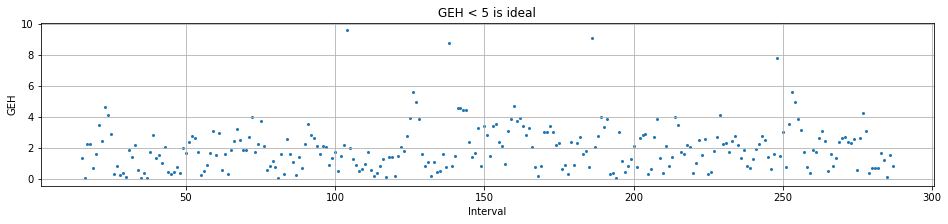

In [127]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(figsize=(16,3))

# Now use the axes object to add stuff to plot
axes.scatter(x, GEH, 4)
axes.set_xlabel('Interval')
axes.set_ylabel('GEH')
axes.set_title('GEH < 5 is ideal')
axes.grid()

In [128]:
GEH30 = num/len(GEH)

# 60 mins ahead

In [112]:
model60 = keras.models.load_model("my_dir/7d-CNN-LSTM-60")

### Evaluation on inverse_transform

In [113]:
test_predictions60 = model60.predict((Wv60,Xv60))

yv60 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
yv60 = yv60[26:,4]

df = Test.drop(Test.head(26).index)
df.reset_index(inplace = True)
df = df.drop(columns=['index','Timestamp'])
df['f5'] = pd.Series(test_predictions60.flatten())

test_predictions60 = scaler.inverse_transform(df)

test_predictions60 = test_predictions60[:,4]

#MSE60 = mean_squared_error(yv60,test_predictions60)

#MAE60 = mean_absolute_error(yv60,test_predictions60)

#RMSE60 = np.sqrt(MSE60)

#MAPE60 = mean_absolute_percentage_error(yv60,test_predictions60)*100

#eval60 = [MSE60, MAE60, RMSE60, MAPE60]
#print(eval60)

In [114]:
RA10 = ra.RA_10(np.asarray(yv60), np.asarray(test_predictions60))
RA15 = ra.RA_15(np.asarray(yv60), np.asarray(test_predictions60))
RA20 = ra.RA_20(np.asarray(yv60), np.asarray(test_predictions60))

res60 = [RA10, RA15, RA20]
print(res60)

[60.03494757863205, 77.85821268097854, 88.01797304043934]


In [115]:
GEH, num, actual, predicted = ga.GEH(np.asarray(yv60), np.asarray(test_predictions60))
GEH1, _ = ga1.GEH(np.asarray(yv60), np.asarray(test_predictions60))

In [116]:
GEH = np.pad(GEH[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))
GEH1 = np.pad(GEH1[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))

In [117]:
actual = np.pad(actual, (1, 1), 'edge')
predicted = np.pad(predicted, (1, 1), 'edge')

In [118]:
x = np.arange(1,len(GEH)+1)
x1 = np.arange(1,len(GEH1)+1)

In [119]:
yv60 = np.pad(yv60[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))
test_predictions60 = np.pad(test_predictions60[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))
actual = np.pad(actual[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))
predicted = np.pad(predicted[:273], (15,0), 'constant', constant_values=(np.nan, np.nan))

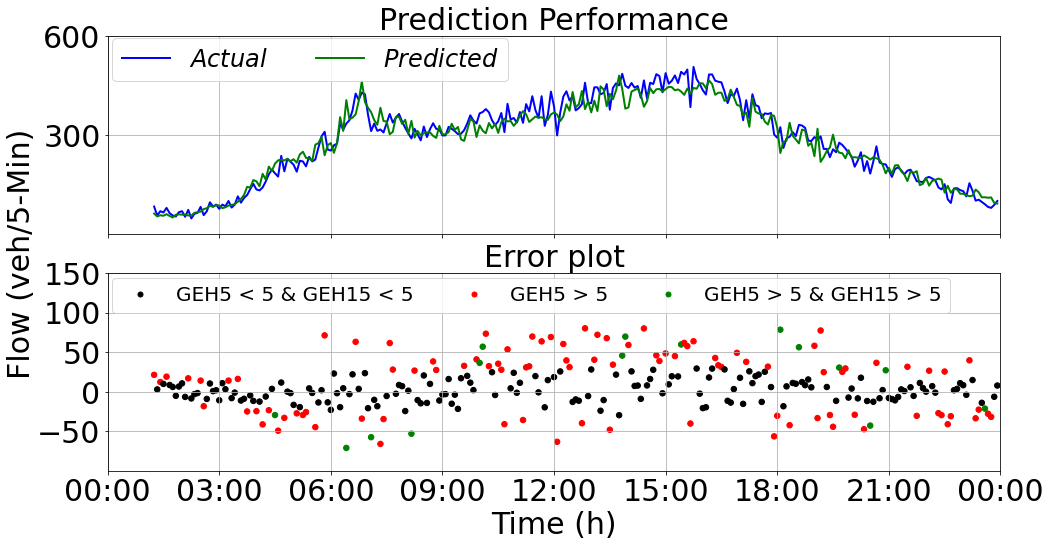

In [171]:
x= np.arange(0,288)
col = np.where(GEH>5, 'g', np.where(GEH1>5, 'r','k'))

fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(16,8))

#set tick labels font size for y-axis only
# axes.tick_params(axis='y', which='both', labelsize=20)

# 1 Prediction plot
axes[0].plot(yv60, lw=2, label=r'$Actual$', color='blue')
axes[0].plot(test_predictions60, lw=2, label=r'$Predicted$', color='green')
axes[0].legend(bbox_to_anchor=(0.005,0.77,0.4,0.1), loc="lower left", mode=None, 
               borderaxespad=0, ncol=4, prop={'size': 24})
axes[0].set_title('Prediction Performance', fontsize=30)
axes[0].grid()
# x
axes[0].set_xlim(0,288)
axes[0].set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes[0].set_xticklabels([])
# y
axes[0].set_ylim(0,600)
axes[0].set_ylabel('Flow (veh/5-Min)', fontsize=30)
axes[0].yaxis.set_major_locator(MaxNLocator(nbins=2, prune='lower'))
axes[0].yaxis.set_label_coords(-0.08,-0.1)
axes[0].tick_params(axis='y', labelsize= 30)



# 2 Error plot
axes[1].scatter(x, (yv60-test_predictions60), s=30, c=col)
line1, = axes[1].plot(0, 0, marker="o", markersize=0.01, markeredgecolor="black", 
                      markerfacecolor="black", label='GEH5 < 5 & GEH15 < 5', ls="None")
line2, = axes[1].plot(0, 0, marker="o", markersize=0.01, markeredgecolor="red", 
                      markerfacecolor="red", label='GEH5 > 5', ls="None")
line3, = axes[1].plot(0, 0, marker="o", markersize=0.01, markeredgecolor="green", 
                      markerfacecolor="green", label='GEH5 > 5 & GEH15 > 5', ls="None")
axes[1].legend(handles=[line1, line2, line3], markerscale=500, bbox_to_anchor=(0.005,0.8,1,0.1), 
               loc="lower left", mode=None, borderaxespad=0, ncol=3, prop={'size': 20})
axes[1].set_title('Error plot', fontsize=30)
axes[1].grid()

# x
axes[1].set_xlim(0,288)
axes[1].set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes[1].set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'], fontsize=30)
axes[1].set_xlabel('Time (h)', fontsize=30)
#y
axes[1].set_ylim(-100, 150)
axes[1].yaxis.set_major_locator(MaxNLocator(nbins=6, prune='lower'))
axes[1].tick_params(axis='y', labelsize= 30)


plt.show()

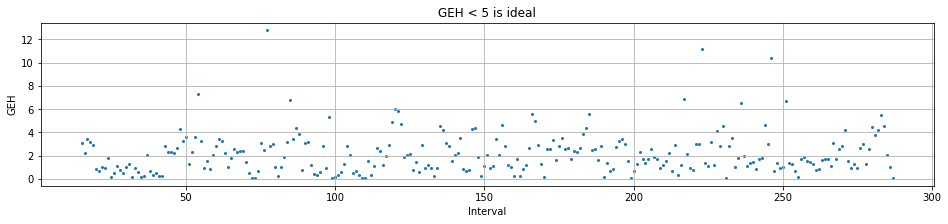

In [163]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(figsize=(16,3))

# Now use the axes object to add stuff to plot
axes.scatter(x, GEH, 4)
axes.set_xlabel('Interval')
axes.set_ylabel('GEH')
axes.set_title('GEH < 5 is ideal')
axes.grid()

In [164]:
GEH60 = num/len(GEH)

In [165]:
len(x)

288

In [166]:
len(GEH)

288

## GEH

In [167]:
m = ["GEH5", "GEH15", "GEH30", "GEH60"]

In [169]:
# GEH_ = [GEH5, GEH15, GEH30, GEH60]

In [ ]:
data = np.asarray(GEH_).reshape((1, 4))
df = pd.DataFrame(data=data,columns=m)
df

# Figure

In [ ]:
col = np.where(GEH>5, 'm','b')
col1 = np.where(GEH1>5, 'r','b')

In [ ]:
fig,axes = plt.subplots(nrows=4,ncols=1,figsize=(16,16))


# 1 Prediction plot
axes[0].plot(yv60, lw=2, label=r'$Actual$', color='blue')
axes[0].plot(test_predictions60, lw=2, label=r'$Predicted$', color='green')
axes[0].plot(actual, lw=2, label=r'$Actual\:(filtered)$', color='peru', linestyle='dashdot')
axes[0].plot(predicted, lw=2, label=r'$Predicted\:(filtered)$', color='brown', linestyle='dashdot')

axes[0].legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=4, prop={'size': 16})
axes[0].grid()
# x
axes[0].set_xlim(0,288)
axes[0].set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes[0].set_xticklabels([])
# y
axes[0].set_ylim(0,600)
axes[0].set_ylabel('Flow (veh/5-Min)', fontsize=24)
axes[0].yaxis.set_major_locator(MaxNLocator(nbins=2, prune='lower'))
axes[0].yaxis.set_label_coords(-0.05,-0.1)



# 2 Error plot
axes[1].plot((yv60-test_predictions60), lw=1, label=r'$Error$', color='crimson')
axes[1].plot((actual-predicted), lw=1.5, label=r'$Error\:(filtered)$', color='black') 

axes[1].legend(bbox_to_anchor=(0,1.02,0.4,0.1), loc="lower left", mode="expand", borderaxespad=0, ncol=2, prop={'size': 16})
axes[1].grid()
# x
axes[1].set_xlim(0,288)
axes[1].set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes[1].set_xticklabels([])
#y
axes[1].set_ylim(-100, 100)



# 3 GEH5 plot
axes[2].grid()
axes[2].scatter(x1[:288], GEH1, s=7, c=col1)
line1, = axes[2].plot(0, 0, marker="o", markersize=0.01, markeredgecolor="blue", 
                      markerfacecolor="blue", label='GEH < 5', ls="None")
line2, = axes[2].plot(0, 0, marker="o", markersize=0.01, markeredgecolor="red", 
                      markerfacecolor="red", label='GEH > 5', ls="None")
axes[2].legend(handles=[line1, line2], markerscale=500, bbox_to_anchor=(0,1.02,0.4,0.1), 
               loc="lower left", mode="expand", borderaxespad=0, ncol=2, prop={'size': 16})
# x
axes[2].set_xlim(0,288)
axes[2].set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes[2].set_xticklabels([])
# y
axes[2].yaxis.set_major_locator(MaxNLocator(nbins=4, prune='both', steps=[5]))
axes[2].set_ylabel('GEH5', fontsize=24)
axes[2].set_ylim(0,20)
axes[2].yaxis.set_label_coords(-0.05,0.5)



# 4 GEH5 plot
axes[3].grid()
axes[3].scatter(x[:288], GEH, s=7, c=col)

axes[3].legend(handles=[line1, line2], markerscale=500, bbox_to_anchor=(0,1.02,0.4,0.1), 
               loc="lower left", mode="expand", borderaxespad=0, ncol=2, prop={'size': 16})
# x
axes[3].set_xlim(0,288)
axes[3].set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes[3].set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'], fontsize=20)
axes[3].set_xlabel('Time (h)', fontsize=20)
# y
axes[3].set_ylabel('GEH15', fontsize=24)
axes[3].set_ylim(0,20)
axes[3].yaxis.set_major_locator(MaxNLocator(nbins=4, prune='both', steps=[5]))
axes[3].yaxis.set_label_coords(-0.05,0.5)

# plt.xticks(fontsize= 20)
# plt.yticks(fontsize= 20)